<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/3.HandsOnIntro-Supervised%20Regression/Practice_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
https://www.kaggle.com/datasets/mehmetisik/advertisingcsv/data




**Dataset Overview**

This dataset provides a detailed analysis of the advertising spending across different media channels and its impact on sales. Designed for marketing analysts, data scientists, and business strategists, this dataset facilitates understanding how different advertising expenditures influence sales performance, aiding in data-driven decision-making for marketing campaigns.

**Key Features**

TV: Investment in TV advertising campaigns (in thousands of dollars).

Radio: Investment in radio advertising campaigns (in thousands of dollars).

Newspaper: Investment in newspaper advertising campaigns (in thousands of dollars).

Sales: Revenue generated from sales campaigns (in thousands of dollars).


**Usage Recommendations and Limitations:**

Recommended Use: Suitable for economic research, marketing analysis, and predictive modeling.

Limitations: Results are based on historical data and assumptions; future advertising campaigns may not follow the same trends.


# Import Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Validate Data

In [123]:
df=pd.read_csv('advertising.csv')

In [124]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [132]:
df=df.rename(columns={"sales":"revenue"})

## Check for missing values

In [133]:
df.isnull().sum()

TV              0
radio           0
newspaper       0
revenue         0
total budget    0
dtype: int64

In [134]:
df.describe()

,TV,radio,newspaper,revenue,total budget
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


# Feature Engineering

In [103]:
# Create a new feature of Total Budget

In [135]:
df['total budget']= df['TV']+df['newspaper']+df['radio']
df.head()

,TV,radio,newspaper,revenue,total budget
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


#EDA




## Distribution of Target Variable

<Axes: xlabel='revenue', ylabel='Count'>

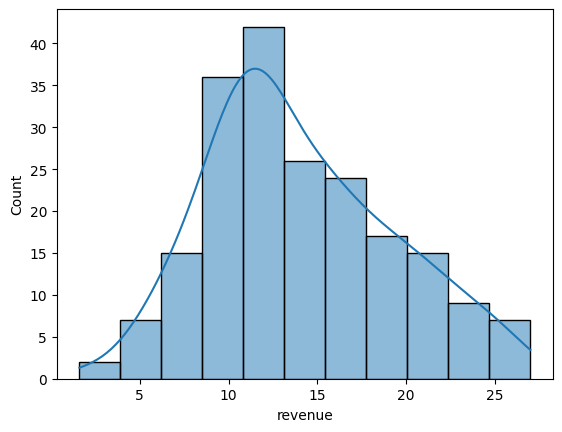

In [136]:
sns.histplot(x='revenue',data=df,kde=True)

## Relation between Total budget spent and revenue

In [106]:
# Draw a scatter plot

<Axes: xlabel='revenue', ylabel='total budget'>

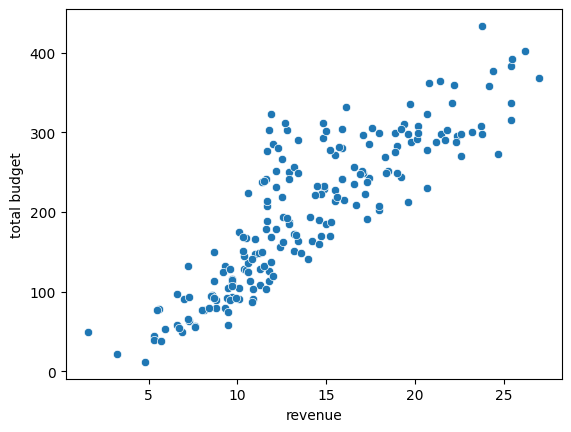

In [137]:
sns.scatterplot(x='revenue',y='total budget',data=df)

# Solve Simple Linear Regression Problem
Come up with best fit line to show relation between total budget and sales

In [108]:
# split into target and feature
df1=df.copy()

In [138]:
X=df1[['total budget']]
y=df1['sales']

In [139]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [140]:
from sklearn.linear_model import LinearRegression

In [142]:
model1=LinearRegression()

In [143]:
model1.fit(X_train,y_train)

LinearRegression()

In [144]:
y_pred=model1.predict(X_test)

In [145]:
y_test[0:4]

95     16.9
15     22.4
30     21.4
158     7.3
Name: sales, dtype: float64

In [146]:
y_pred[0:4]

array([16.30108045, 18.66081248, 22.00947786,  8.76168763])

# Evaluate Model using Peformance Metrics

In [149]:
df_result=pd.DataFrame({"Budget": X_test['total budget'],"Actual Revenue":y_test,"Predicted Revenue":y_pred})
df_result

,Budget,Actual Revenue,Predicted Revenue
95,247.8,16.9,16.301080
15,296.0,22.4,18.660812
30,364.4,21.4,22.009478
158,93.8,7.3,8.761688
128,272.5,24.7,17.510321
115,162.8,12.6,12.139727
69,287.9,22.3,18.264260
170,80.0,8.4,8.086080
174,238.9,11.5,15.865362
45,229.1,14.9,15.385583


In [175]:
df_result=df_result.reset_index(drop=True)

In [172]:
# Get the coefficients (slope and intercept)
slope = model1.coef_[0]
intercept = model1.intercept_

print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 0.048957096175931004
Intercept: 4.1695120134890455


In [173]:
#Validate
y=slope*150.0+4.1695120134890455
y

11.513076439878695

In [187]:
df_result['Residuals']=df_result['Actual Revenue'] -df_result['Predicted Revenue']
df_result['Residuals-Square']=df_result['Residuals']**2
df_result.head()

,Budget,Actual Revenue,Predicted Revenue,Error,Residuals,Residuals-Square
0,247.8,16.9,16.301080,0.598920,0.598920,0.358705
1,296.0,22.4,18.660812,3.739188,3.739188,13.981523
2,364.4,21.4,22.009478,-0.609478,-0.609478,0.371463
3,93.8,7.3,8.761688,-1.461688,-1.461688,2.136531
4,272.5,24.7,17.510321,7.189679,7.189679,51.691488


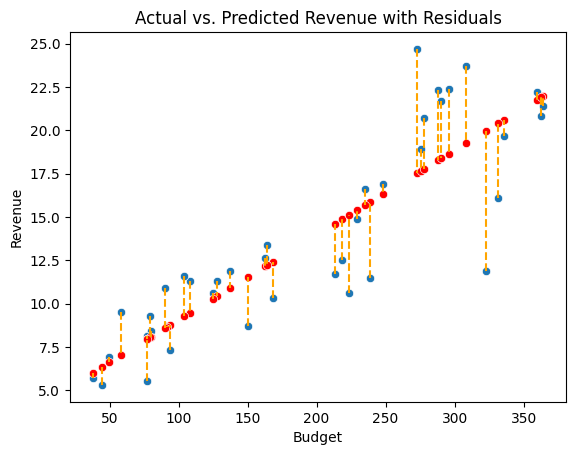

In [188]:
sns.scatterplot(x='Budget',y='Actual Revenue',data=df_result)
sns.scatterplot(x='Budget',y='Predicted Revenue',data=df_result,color='red')

# Plot vertical lines representing residuals
for index, row in df_result.iterrows():
    plt.plot([row['Budget'], row['Budget']], [row['Actual Revenue'], row['Predicted Revenue']], color='orange', linestyle='--')

plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted Revenue with Residuals')
plt.show()

In [193]:
#find all error metrics

mae=abs(df_result['Residuals']).mean()
mse=df_result['Residuals-Square'].mean()
rmse=np.sqrt(mse)
print("mean absolute error",mae)
print("mean squared error",mse)
print("root mean squared error",rmse)


mean absolute error 2.0884273558466147
mean squared error 7.779806406885766
root mean squared error 2.7892304327333313


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [191]:
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=mean_squared_error(y_pred,y_test,squared=False)
print("mean absolute error",mae)
print("mean squared error",mse)
print("root mean squared error",rmse)

mean absolute error 2.0884273558466147
mean squared error 7.779806406885766
root mean squared error 2.7892304327333313
